In [ ]:
# https://keras.io/
!pip install -q keras
!pip install image-classifiers
!pip install git+https://github.com/qubvel/classification_models.git

import keras
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-e6ue598j
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-e6ue598j
  Running command git submodule update --init --recursive -q


In [ ]:
from keras.datasets import cifar10
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras import optimizers
from keras.callbacks import ModelCheckpoint

In [ ]:
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import cv2
import sys

In [ ]:
batch_size = 128
n_classes = 10 #Because CIFAR10 has 10 classes
epochs = 3

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
print(np.mean(x_test[0]))
print(np.mean(x_train[0]))

108.38606770833333
103.447265625


In [ ]:
# normalize inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
print(np.mean(x_test[0]))
print(np.mean(x_train[0]))

0.42504343
0.40567556


In [ ]:
base_model = ResNet50(input_shape=(32,32,3), weights='imagenet', include_top=False)
x = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

94765736/94765736 [==============================] - 2s 0us/step


In [ ]:

sgd = optimizers.SGD(lr=0.1, decay=0.0001, momentum=0.9, nesterov=True)
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 64s 189ms/step - loss: 3.7916 - accuracy: 0.0966
Test loss: 3.791571855545044
Test accuracy: 0.0966000035405159


In [ ]:
import math
# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.7
	epochs_drop = 7.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate
     

In [ ]:
for i in range(1,26):
  print("Epoch "+str(i)+ " : ",step_decay(i))

Epoch 1 :  0.1
Epoch 2 :  0.1
Epoch 3 :  0.1
Epoch 4 :  0.1
Epoch 5 :  0.1
Epoch 6 :  0.06999999999999999
Epoch 7 :  0.06999999999999999
Epoch 8 :  0.06999999999999999
Epoch 9 :  0.06999999999999999
Epoch 10 :  0.06999999999999999
Epoch 11 :  0.06999999999999999
Epoch 12 :  0.06999999999999999
Epoch 13 :  0.048999999999999995
Epoch 14 :  0.048999999999999995
Epoch 15 :  0.048999999999999995
Epoch 16 :  0.048999999999999995
Epoch 17 :  0.048999999999999995
Epoch 18 :  0.048999999999999995
Epoch 19 :  0.048999999999999995
Epoch 20 :  0.03429999999999999
Epoch 21 :  0.03429999999999999
Epoch 22 :  0.03429999999999999
Epoch 23 :  0.03429999999999999
Epoch 24 :  0.03429999999999999
Epoch 25 :  0.03429999999999999


In [ ]:
for i in range(1,26):
  print("Epoch "+str(i)+ " : ",step_decay(i))

Epoch 1 :  0.1
Epoch 2 :  0.1
Epoch 3 :  0.1
Epoch 4 :  0.1
Epoch 5 :  0.1
Epoch 6 :  0.06999999999999999
Epoch 7 :  0.06999999999999999
Epoch 8 :  0.06999999999999999
Epoch 9 :  0.06999999999999999
Epoch 10 :  0.06999999999999999
Epoch 11 :  0.06999999999999999
Epoch 12 :  0.06999999999999999
Epoch 13 :  0.048999999999999995
Epoch 14 :  0.048999999999999995
Epoch 15 :  0.048999999999999995
Epoch 16 :  0.048999999999999995
Epoch 17 :  0.048999999999999995
Epoch 18 :  0.048999999999999995
Epoch 19 :  0.048999999999999995
Epoch 20 :  0.03429999999999999
Epoch 21 :  0.03429999999999999
Epoch 22 :  0.03429999999999999
Epoch 23 :  0.03429999999999999
Epoch 24 :  0.03429999999999999
Epoch 25 :  0.03429999999999999


In [ ]:

from keras.callbacks import LearningRateScheduler
lrate = LearningRateScheduler(step_decay)

In [ ]:

# checkpoint
filepath="Assignment_5.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')    

In [ ]:
epochs = 3

In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, validation_data=(x_test, y_test), epochs=epochs, verbose=1,callbacks=[lrate,checkpoint])


Epoch 1/3
391/391 [==============================] - ETA: 0s - loss: 2.1006 - accuracy: 0.3561

391/391 [==============================] - 3409s 9s/step - loss: 2.1006 - accuracy: 0.3561 - val_loss: 2.5130 - val_accuracy: 0.1327 - lr: 0.1000
Epoch 2/3
391/391 [==============================] - ETA: 0s - loss: 1.2692 - accuracy: 0.5593

391/391 [==============================] - 3397s 9s/step - loss: 1.2692 - accuracy: 0.5593 - val_loss: 2.5776 - val_accuracy: 0.2744 - lr: 0.1000
Epoch 3/3
391/391 [==============================] - ETA: 0s - loss: 0.8970 - accuracy: 0.6844

391/391 [==============================] - 3449s 9s/step - loss: 0.8970 - accuracy: 0.6844 - val_loss: 1.3272 - val_accuracy: 0.5621 - lr: 0.1000


In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

 10/313 [..............................] - ETA: 44s - loss: 1.2723 - accuracy: 0.5594

In [ ]:
# Save the trained weights in to .h5 format
model.save_weights("ResNet_CIFAR10_Weights_Best.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# Save the trained model in to .h5 format
model.save("ResNet_CIFAR10_Model_Best.h5")
print("Saved model to disk")

In [ ]:
y_pred = model.predict(x_test, verbose = 1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_max_probas = np.max(y_pred, axis=1)

313/313 [==============================] - 49s 154ms/step


In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

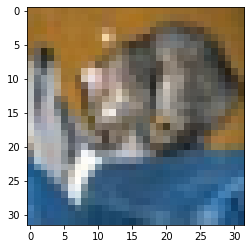

In [ ]:
plt.imshow(x_test[0])

In [ ]:
model.predict(np.array([x_test[0]]))

1/1 [==============================] - 0s 37ms/step


array([[0.01882753, 0.00066576, 0.3453195 , 0.12024297, 0.38068214,
        0.05712456, 0.05131734, 0.00591097, 0.01885663, 0.00105254]],
      dtype=float32)

In [ ]:
model = keras.models.load_model('/content/ResNet_CIFAR10_Model_Best.h5')

In [ ]:
model.predict(np.array([x_test[0]]))

1/1 [==============================] - 1s 1s/step


array([[0.01882753, 0.00066576, 0.3453195 , 0.12024297, 0.38068214,
        0.05712456, 0.05131734, 0.00591097, 0.01885663, 0.00105254]],
      dtype=float32)